### Basic usage 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
names = ['John', 'Matt', 'Sara', 'Jim', 'Ashley']
ids = [ 23, 34, 83, 86, 12]
balance = [10.2, 84.3, 72.9, 27.1, 223.1]
dic = {'ids': ids, 'names': names, 'bal':balance}

users = pd.DataFrame(dic) 

users.set_index('ids', inplace = True)
users

,names,bal
ids,,
23,John,10.2
34,Matt,84.3
83,Sara,72.9
86,Jim,27.1
12,Ashley,223.1


In [19]:
users = pd.DataFrame({'names': names, 'bal':balance}, index=ids)
users

,names,bal
23,John,10.2
34,Matt,84.3
83,Sara,72.9
86,Jim,27.1
12,Ashley,223.1


### Read from file

In [20]:
import os
filename = os.path.join('data','names','yob1880.txt')
print (filename)
names = pd.read_csv(filename)
names.head(3) #First 3 items

data/names/yob1880.txt


,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939


If file doesn't have a list of column names we can provide it

In [80]:
names = pd.read_csv(filename, names=['name','gender','births'])
names.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


### Selection

In [81]:
names['name'].head()

0         Mary
1         Anna
2         Emma
3    Elizabeth
4       Minnie
Name: name, dtype: object

In [82]:
## Reindexing just make sure index start from 1
names.index = names.index +1
names.head(5)

,name,gender,births
1,Mary,F,7065
2,Anna,F,2604
3,Emma,F,2003
4,Elizabeth,F,1939
5,Minnie,F,1746


In [83]:
names.loc[2] # it's the label of index

name      Anna
gender       F
births    2604
Name: 2, dtype: object

In [84]:
names.iloc[1] ## It's the index position

name      Anna
gender       F
births    2604
Name: 2, dtype: object

In [85]:
names[0:10] ## Slice rows

,name,gender,births
1,Mary,F,7065
2,Anna,F,2604
3,Emma,F,2003
4,Elizabeth,F,1939
5,Minnie,F,1746
6,Margaret,F,1578
7,Ida,F,1472
8,Alice,F,1414
9,Bertha,F,1320
10,Sarah,F,1288


In [91]:
names[names['births'] > 3000]

,name,gender,births
1,Mary,F,7065
943,John,M,9655
944,William,M,9533
945,James,M,5927
946,Charles,M,5348
947,George,M,5126
948,Frank,M,3242


### Merging data frames

Our classic example of movies, users and ratings is back

In [92]:
!head -5 data/movies/users.dat

1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455


In [29]:
!head -5 data/movies/ratings.dat

1::1193::5::978300760
1::661::3::978302109
1::914::3::978301968
1::3408::4::978300275
1::2355::5::978824291


In [30]:
!head -5 data/movies/movies.dat

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy


In [94]:
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table(os.path.join('data','movies','users.dat'), 
                      sep='::', names=unames, engine='python') 
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [32]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(os.path.join('data','movies','ratings.dat'), 
                        sep='::', header=None, names=rnames, engine='python')
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [33]:
mnames = ['movie_id', 'title','genres']
movies = pd.read_table(os.path.join('data','movies','movies.dat'), 
                       sep='::', header=None, names=mnames, engine='python')
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [100]:
tmp = pd.merge(ratings, users, on='user_id', how='inner') # on and how are set to defaults
tmp.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [35]:
data = pd.merge(tmp, movies, on='movie_id')
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [36]:
data.shape

(1000209, 10)

In [105]:
data.describe()

,user_id,movie_id,rating,timestamp,age,occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [38]:
data.describe(exclude=[np.number])

,gender,zip,title,genres
count,1000209,1000209,1000209,1000209
unique,2,3439,3706,301
top,M,94110,American Beauty (1999),Comedy
freq,753769,3802,3428,116883


## Unique Values

### We want to get movies that are rated most number of times

In [39]:
data.title.value_counts().head()

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: title, dtype: int64

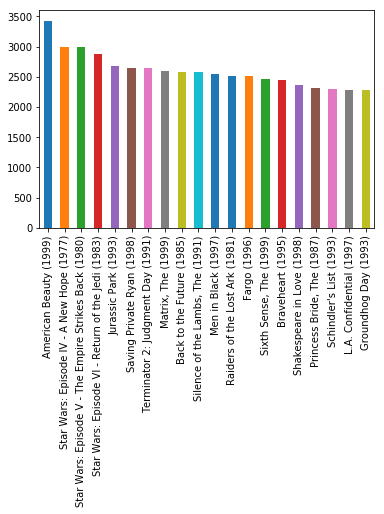

In [106]:
ax = data.title.value_counts()[:20].plot(kind='bar')


### Supose we want movies that are rated most number of times by males

In [108]:
data[data['gender']=='M'].title.value_counts().head()

American Beauty (1999)                                   2482
Star Wars: Episode IV - A New Hope (1977)                2344
Star Wars: Episode V - The Empire Strikes Back (1980)    2342
Star Wars: Episode VI - Return of the Jedi (1983)        2230
Terminator 2: Judgment Day (1991)                        2193
Name: title, dtype: int64

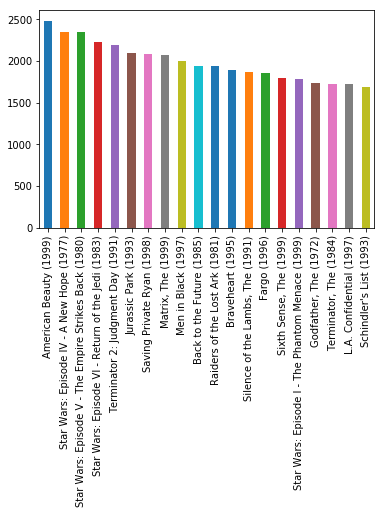

In [109]:
ax = data[data['gender']=='M'].title.value_counts()[:20].plot(kind='bar')

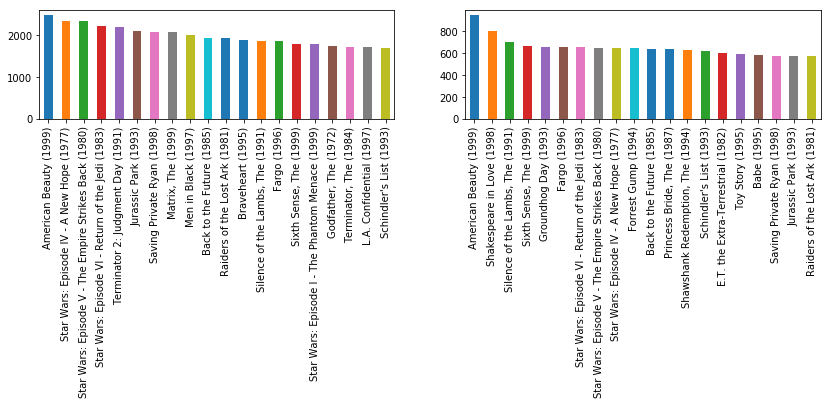

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,2))
ax1 = data[data['gender']=='M'].title.value_counts()[:20].plot(kind='bar', ax=ax1)
ax2 = data[data['gender']=='F'].title.value_counts()[:20].plot(kind='bar', ax=ax2)
##

### Group By

### Mean ratings for each movie

In [112]:
tmp = data[['title', 'rating']]

In [115]:
mean_rating = tmp.groupby('title').mean()
mean_rating.sort_values('rating', ascending=False).head()


,rating
title,
Ulysses (Ulisse) (1954),5.0
Lured (1947),5.0
Follow the Bitch (1998),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0


something odd, we have average as 5 and no known movies on top


In [46]:
## Aggregate functions as a list

In [121]:
mean_rating = tmp.groupby('title').rating.agg(['mean','count', 'min', 'max'])
mean_rating.sort_values(['mean','count','min','max'], ascending=[False, False, False, False]).head()

,mean,count,min,max
title,,,,
"Gate of Heavenly Peace, The (1995)",5.0,3,5,5
Smashing Time (1967),5.0,2,5,5
"Baby, The (1973)",5.0,1,5,5
Bittersweet Motel (2000),5.0,1,5,5
Follow the Bitch (1998),5.0,1,5,5


In [48]:
mask = mean_rating['count'] > 1000
mean_rating[mask].head()

,mean,count,min,max
title,,,,
2001: A Space Odyssey (1968),4.068765,1716,1,5
"Abyss, The (1989)",3.683965,1715,1,5
"African Queen, The (1951)",4.251656,1057,1,5
Air Force One (1997),3.588290,1076,1,5
Airplane! (1980),3.971115,1731,1,5


In [49]:
mean_rating[mask].sort_values('mean', ascending=False).head(5)

,mean,count,min,max
title,,,,
"Shawshank Redemption, The (1994)",4.554558,2227,1,5
"Godfather, The (1972)",4.524966,2223,1,5
"Usual Suspects, The (1995)",4.517106,1783,1,5
Schindler's List (1993),4.510417,2304,1,5
Raiders of the Lost Ark (1981),4.477725,2514,1,5


### Pivot tables

Suppose we want ratings of movies gender wise

In [50]:
ratings_by_gender = pd.pivot_table(data, values='rating', 
                                  index='title', 
                                  columns='gender', aggfunc=np.mean)

In [51]:
ratings_by_gender.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [52]:
ratings_by_gender.sort_values(['F','M'], ascending=[False, False]).head()

gender,F,M
title,,
"Gate of Heavenly Peace, The (1995)",5.0,5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964),5.0,4.750000
Lamerica (1994),5.0,4.666667
Ayn Rand: A Sense of Life (1997),5.0,4.000000
Skipped Parts (2000),5.0,4.000000


In [53]:
ratings_by_gender.sort_values(['M','F'], ascending=[False, False]).head()

gender,F,M
title,,
"Gate of Heavenly Peace, The (1995)",5.000000,5.0
"Bells, The (1926)",4.000000,5.0
Dangerous Game (1993),4.000000,5.0
Small Wonders (1996),3.333333,5.0
Angela (1995),3.000000,5.0
